In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [192]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [193]:
le = LabelEncoder()
for i in stroke_df.columns[1:]:
    if(stroke_df[i].dtype == 'object'):
        stroke_df[i] = le.fit_transform(stroke_df[i])
        
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi']).mean()

### Standardize Data

In [194]:
scale = StandardScaler()
stroke_df[['age','avg_glucose_level','bmi']] = scale.fit_transform(stroke_df[['age','avg_glucose_level','bmi']])

### Split into Train & Testing Data

In [202]:
X = stroke_df[['heart_disease','hypertension','age','avg_glucose_level','bmi', 'smoking_status', 'work_type']]
y = stroke_df['stroke']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size = 0.3, random_state = 0)

In [203]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,1.051434,0,1,1,2,1,2.706375,-7.105427e-15,1,1
1,51676,0,0.786070,0,0,1,3,0,2.121559,-7.105427e-15,2,1
2,31112,1,1.626390,0,1,1,2,0,-0.005028,-7.105427e-15,2,1
3,60182,0,0.255342,0,0,1,2,1,1.437358,-7.105427e-15,3,1
4,1665,0,1.582163,1,0,1,3,0,1.501184,-7.105427e-15,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,1,2,1,-0.494658,-7.105427e-15,2,0
5106,44873,0,1.670617,0,0,1,3,1,0.420775,-7.105427e-15,2,0
5107,19723,0,-0.363842,0,0,1,3,0,-0.511443,-7.105427e-15,2,0
5108,37544,1,0.343796,0,0,1,2,0,1.328257,-7.105427e-15,1,0


## Logistic Regression Model

In [204]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
f_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('AUC-ROC:', auc_roc)
LRs, LRt, _ = roc_curve(y_test, y_pred)

Accuracy: 0.7826534110387384
F-score: 0.7910349373764008
AUC-ROC: 0.7824462308722939


## Naive Bayes Model

In [205]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
f_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('AUC-ROC:', auc_roc)
NBr, NBm, _ = roc_curve(y_test, y_pred)


Accuracy: 0.743914981145012
F-score: 0.7401739130434782
AUC-ROC: 0.744024163787227


## K Nearest Neighbor Classifier model

In [206]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
f_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('AUC-ROC:', auc_roc)
KNr, KNt, _ = roc_curve(y_test, y_pred)


Accuracy: 0.8639012684264655
F-score: 0.8709782255443614
AUC-ROC: 0.8636109348188891


## Support Vector Machine Classifier model

In [207]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
f_score = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('AUC-ROC:', auc_roc)
SVr, SVt, _ = roc_curve(y_test, y_pred)

Accuracy: 0.7812821391840933
F-score: 0.7904073587385019
AUC-ROC: 0.7810549326563713


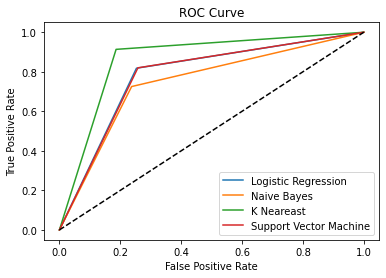

In [208]:
plt.plot(LRs, LRt, label='Logistic Regression')
plt.plot(NBr,NBm, label="Naive Bayes")
plt.plot(KNr,KNt, label="K Neareast")
plt.plot(SVr,SVt, label="Support Vector Machine")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()